# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [6]:
float_cols = [
    "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]
for col in float_cols:
    countries[col] = countries[col].str.replace(',', '.').astype(float)
    
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

In [7]:
strip_cols = [
    "Country", "Region"
]

for col in strip_cols:
    countries[col] = countries[col].transform(str.strip)
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [8]:
def q1():
    return countries["Region"].drop_duplicates().sort_values().to_list()


q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [9]:
from sklearn.preprocessing import KBinsDiscretizer


def q2():
    est = KBinsDiscretizer(n_bins=10, encode='ordinal')
    binned = est.fit_transform(countries['Pop_density'].to_numpy().reshape(-1,1))
    return len(binned[binned==9])


q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [10]:
from sklearn.preprocessing import OneHotEncoder


def q3():
    # One-hot encoding cria n atributos sendo n o número de categorias únicas.
    # Porém, há uma variável redundante, logo idealmente cada encoding produz n-1 atributos.
    # Aparentemente o resultado esperado também classifica NaNs como um atributo a parte.
    countries['Climate'].fillna(0, inplace=True)
    ohe = OneHotEncoder(dtype=np.int32)
    encoded = ohe.fit_transform(countries[['Region', 'Climate']])
    return encoded.shape[1]


q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [11]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


def q4():
    numeric_cols = [cname for cname in countries.columns if countries[cname].dtype in ['int64', 'float64']]
    model = Pipeline([
        ("fill", SimpleImputer(strategy='median')),
        ("standardize", StandardScaler())
    ])
    model.fit(countries[numeric_cols])
    df_test_country = pd.DataFrame([dict(zip(new_column_names, test_country))])
    arable_idx = numeric_cols.index('Arable')
    return float(round(model.transform(df_test_country[numeric_cols])[0][arable_idx], 3))


q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

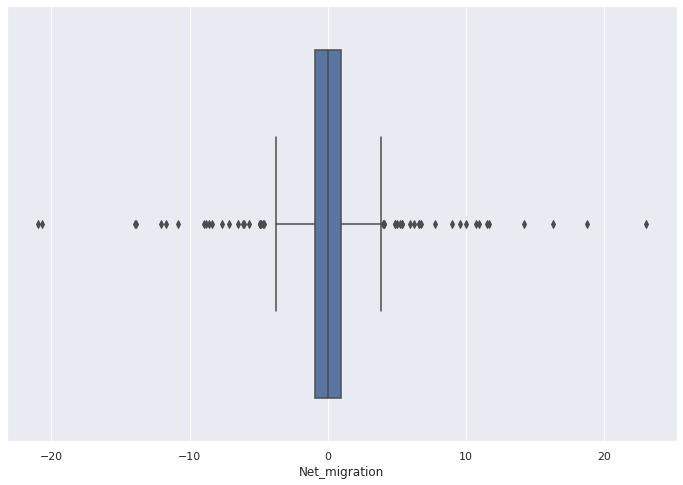

In [13]:
sns.boxplot(countries['Net_migration'])

In [14]:
def q5():
    x = countries['Net_migration']
    q1, q3 = x.quantile([.25, .75])
    iqr = q3 - q1
    outliers_abaixo = int(x[x < q1 - 1.5*iqr].shape[0])
    outliers_acima = int(x[x > q3 + 1.5*iqr].shape[0])
    # Observando o boxplot, vemos que há muitos outliers.
    # Talvez uma melhor alternativa seria rever a classificação de outliers.
    # Aqui acabei escolhendo remover somente se a quantidade de outliers é menor que 10%
    removeria = bool((outliers_abaixo + outliers_acima)/x.shape[0] < 0.1)
    return (outliers_abaixo, outliers_acima, removeria)


q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [15]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
vec = CountVectorizer()
X = vec.fit_transform(newsgroup['data'])
phone_id = vec.vocabulary_['phone']
X

<1773x27335 sparse matrix of type '<class 'numpy.int64'>'
	with 227238 stored elements in Compressed Sparse Row format>

In [16]:
max(vec.vocabulary_.values())

27334

In [17]:
X[:, phone_id].sum()

213

In [18]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


def q6():
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    vec = CountVectorizer()
    X = vec.fit_transform(newsgroup['data'])
    phone_id = vec.vocabulary_['phone']
    return int(X[:, phone_id].sum())


q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer


def q7():
    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(newsgroup['data'])
    phone_id = tfidf.vocabulary_['phone']
    return float(np.round(sum(X[:, phone_id].toarray()), 3))


q7()

8.888